In [89]:
import json
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset

### load data

In [69]:
df = pd.read_json('data/strandenergylist.json')
df

,0,1
0,ATTACTTGCATGACGATCGTTGGTCGGCTC,-3.002072
1,TTAACCCGGCGTTTAGCCTCAATGAACTGC,-3.578137
2,AATCCGTTTCGCCAGTGCCCTGGTCAAGGC,-4.370569
3,AGTTCTTCGTTACTTTCTGTTCTATAATAA,-1.392860
4,GACATTCTTTGGTTGCCGACTAAGTCGAAA,-4.501841
...,...,...
999995,TGACGCGGTGACCTGGGATAGAGACAATAG,-2.063522
999996,ACAATGGTTCAAACCAATTAAAAATGACCG,-3.866087
999997,GCCAAGAGTTATTTAAATGTCCCCAAGTCG,-1.677556
999998,GCCGGAGCAGCCTCGACGCACTCCATCCGA,-4.132723


### expand features to multiple rows

In [70]:
df_exp = df[0].str.split('', expand=True)
df_exp

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,,A,T,T,A,C,T,T,G,C,...,G,G,T,C,G,G,C,T,C,
1,,T,T,A,A,C,C,C,G,G,...,A,T,G,A,A,C,T,G,C,
2,,A,A,T,C,C,G,T,T,T,...,G,G,T,C,A,A,G,G,C,
3,,A,G,T,T,C,T,T,C,G,...,C,T,A,T,A,A,T,A,A,
4,,G,A,C,A,T,T,C,T,T,...,A,A,G,T,C,G,A,A,A,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,,T,G,A,C,G,C,G,G,T,...,A,G,A,C,A,A,T,A,G,
999996,,A,C,A,A,T,G,G,T,T,...,A,A,A,T,G,A,C,C,G,
999997,,G,C,C,A,A,G,A,G,T,...,C,C,C,A,A,G,T,C,G,
999998,,G,C,C,G,G,A,G,C,A,...,T,C,C,A,T,C,C,G,A,


### add labels

In [71]:
df_exp[31] = df[1]
df_exp

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,,A,T,T,A,C,T,T,G,C,...,G,G,T,C,G,G,C,T,C,-3.002072
1,,T,T,A,A,C,C,C,G,G,...,A,T,G,A,A,C,T,G,C,-3.578137
2,,A,A,T,C,C,G,T,T,T,...,G,G,T,C,A,A,G,G,C,-4.370569
3,,A,G,T,T,C,T,T,C,G,...,C,T,A,T,A,A,T,A,A,-1.392860
4,,G,A,C,A,T,T,C,T,T,...,A,A,G,T,C,G,A,A,A,-4.501841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,,T,G,A,C,G,C,G,G,T,...,A,G,A,C,A,A,T,A,G,-2.063522
999996,,A,C,A,A,T,G,G,T,T,...,A,A,A,T,G,A,C,C,G,-3.866087
999997,,G,C,C,A,A,G,A,G,T,...,C,C,C,A,A,G,T,C,G,-1.677556
999998,,G,C,C,G,G,A,G,C,A,...,T,C,C,A,T,C,C,G,A,-4.132723


In [72]:
# Drop extra column
df_clean = df_exp.drop([0], axis = 1)
df_clean

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,A,T,T,A,C,T,T,G,C,A,...,G,G,T,C,G,G,C,T,C,-3.002072
1,T,T,A,A,C,C,C,G,G,C,...,A,T,G,A,A,C,T,G,C,-3.578137
2,A,A,T,C,C,G,T,T,T,C,...,G,G,T,C,A,A,G,G,C,-4.370569
3,A,G,T,T,C,T,T,C,G,T,...,C,T,A,T,A,A,T,A,A,-1.392860
4,G,A,C,A,T,T,C,T,T,T,...,A,A,G,T,C,G,A,A,A,-4.501841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,T,G,A,C,G,C,G,G,T,G,...,A,G,A,C,A,A,T,A,G,-2.063522
999996,A,C,A,A,T,G,G,T,T,C,...,A,A,A,T,G,A,C,C,G,-3.866087
999997,G,C,C,A,A,G,A,G,T,T,...,C,C,C,A,A,G,T,C,G,-1.677556
999998,G,C,C,G,G,A,G,C,A,G,...,T,C,C,A,T,C,C,G,A,-4.132723


### add column names

In [73]:
df_clean.columns = ['one','two','three','four','five','six','seven','eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen','fifteen','sixteen','seventeen', 'eighteen', 'nineteen', 'twenty', 'twentyone', 'twentytwo', 'twentythree', 'twentyfour', 'twentyfive', 'twentysix', 'twentyseven', 'twentyeight','twentynine','thrity', 'freeenergy']

In [74]:
df_clean

,one,two,three,four,five,six,seven,eight,nine,ten,...,twentytwo,twentythree,twentyfour,twentyfive,twentysix,twentyseven,twentyeight,twentynine,thrity,freeenergy
0,A,T,T,A,C,T,T,G,C,A,...,G,G,T,C,G,G,C,T,C,-3.002072
1,T,T,A,A,C,C,C,G,G,C,...,A,T,G,A,A,C,T,G,C,-3.578137
2,A,A,T,C,C,G,T,T,T,C,...,G,G,T,C,A,A,G,G,C,-4.370569
3,A,G,T,T,C,T,T,C,G,T,...,C,T,A,T,A,A,T,A,A,-1.392860
4,G,A,C,A,T,T,C,T,T,T,...,A,A,G,T,C,G,A,A,A,-4.501841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,T,G,A,C,G,C,G,G,T,G,...,A,G,A,C,A,A,T,A,G,-2.063522
999996,A,C,A,A,T,G,G,T,T,C,...,A,A,A,T,G,A,C,C,G,-3.866087
999997,G,C,C,A,A,G,A,G,T,T,...,C,C,C,A,A,G,T,C,G,-1.677556
999998,G,C,C,G,G,A,G,C,A,G,...,T,C,C,A,T,C,C,G,A,-4.132723


In [10]:
df_clean.iloc[:2,0:30].values

array([['A', 'T', 'T', 'A', 'C', 'T', 'T', 'G', 'C', 'A', 'T', 'G', 'A',
        'C', 'G', 'A', 'T', 'C', 'G', 'T', 'T', 'G', 'G', 'T', 'C', 'G',
        'G', 'C', 'T', 'C'],
       ['T', 'T', 'A', 'A', 'C', 'C', 'C', 'G', 'G', 'C', 'G', 'T', 'T',
        'T', 'A', 'G', 'C', 'C', 'T', 'C', 'A', 'A', 'T', 'G', 'A', 'A',
        'C', 'T', 'G', 'C']], dtype=object)

## One hot encoding

In [76]:
# test
def one_hot_encode(seq):
    mapping = dict(zip("ACGT", range(4)))
    seq2 = [mapping[i] for i in seq]
    return np.eye(4)[seq2]

a = one_hot_encode("A")
type(a)

numpy.ndarray

In [77]:
df_one_hot = pd.DataFrame()
for i in range(30):
    df_one_hot[i] = df_clean.iloc[:,i].apply(lambda x: one_hot_encode(x))
df_one_hot

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]",...,"[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]"
1,"[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]",...,"[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]"
2,"[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]",...,"[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]"
3,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]",...,"[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]"
4,"[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]",...,"[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,"[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]",...,"[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]"
999996,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]",...,"[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]"
999997,"[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]",...,"[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0

In [79]:
type(df_one_hot[0][0])

numpy.ndarray

In [80]:
df_test = df_one_hot.copy()
df_test['free']=df_clean['freeenergy']
df_test

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,free
0,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]",...,"[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]",-3.002072
1,"[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]",...,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]",-3.578137
2,"[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]",...,"[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]",-4.370569
3,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]",...,"[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]",-1.392860
4,"[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]",...,"[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]",-4.501841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,"[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]",...,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]",-2.063522
999996,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]",...,"[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]",-3.866087
999997,"[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]",...,"[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]

In [81]:
type(df_test[0][0])

numpy.ndarray

In [82]:
df_trial = df_test.iloc[:1000,:]
df_trial

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,free
0,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]",...,"[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]",-3.002072
1,"[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]",...,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]",-3.578137
2,"[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]",...,"[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]",-4.370569
3,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]",...,"[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]",-1.392860
4,"[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]",...,"[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]",-4.501841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]",...,"[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]",-3.008021
996,"[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]",...,"[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]",-3.414629
997,"[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]",...,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0

In [83]:
type(df_trial[0][0])

numpy.ndarray

In [22]:
#df_trial.to_csv('data/df_trial.csv')

# Set up

In [138]:
#df_trial = pd.read_csv('data/df_trial.csv')
#df_trial

<AxesSubplot: xlabel='free', ylabel='Count'>

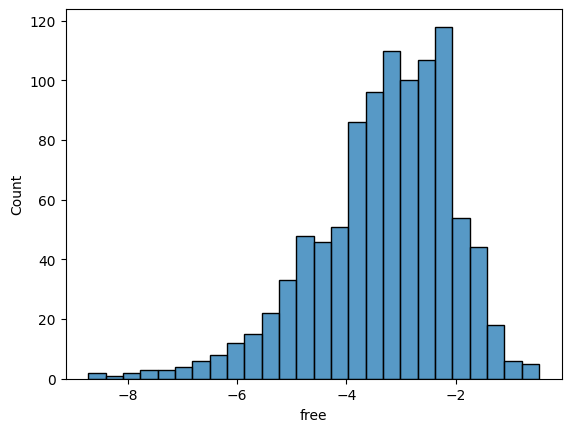

In [84]:
sns.histplot(data=df_trial, x='free')

In [85]:
free_mean = df_trial['free'].mean()
free_std = df_trial['free'].std()

df_std = df_trial.copy()

In [86]:
df_std = df_trial.copy()
df_std['free'] = (df_trial['free']-free_mean)/free_std
df_std

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,free
0,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]",...,"[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]",0.250181
1,"[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]",...,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]",-0.202319
2,"[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]",...,"[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]",-0.824777
3,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]",...,"[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]",1.514221
4,"[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]",...,"[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]",-0.927891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]",...,"[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]",0.245509
996,"[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]",...,"[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]",-0.073883
997,"[[0.0, 0.0, 1.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]",...,"[[1.0, 0.0, 0.0, 0.0]]","[[0.0, 0.0, 0.0, 1.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 1.0, 0.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 0.0, 1.0, 0.0]]","[[0.0, 1

In [24]:
#df_std = df_std.drop(['Unnamed: 0'], axis=1)
#df_std

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,free
0,[[1. 0. 0. 0.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[1. 0. 0. 0.]],[[0. 1. 0. 0.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[0. 0. 1. 0.]],[[0. 1. 0. 0.]],[[1. 0. 0. 0.]],...,[[0. 0. 1. 0.]],[[0. 0. 1. 0.]],[[0. 0. 0. 1.]],[[0. 1. 0. 0.]],[[0. 0. 1. 0.]],[[0. 0. 1. 0.]],[[0. 1. 0. 0.]],[[0. 0. 0. 1.]],[[0. 1. 0. 0.]],0.250181
1,[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[1. 0. 0. 0.]],[[1. 0. 0. 0.]],[[0. 1. 0. 0.]],[[0. 1. 0. 0.]],[[0. 1. 0. 0.]],[[0. 0. 1. 0.]],[[0. 0. 1. 0.]],[[0. 1. 0. 0.]],...,[[1. 0. 0. 0.]],[[0. 0. 0. 1.]],[[0. 0. 1. 0.]],[[1. 0. 0. 0.]],[[1. 0. 0. 0.]],[[0. 1. 0. 0.]],[[0. 0. 0. 1.]],[[0. 0. 1. 0.]],[[0. 1. 0. 0.]],-0.202319
2,[[1. 0. 0. 0.]],[[1. 0. 0. 0.]],[[0. 0. 0. 1.]],[[0. 1. 0. 0.]],[[0. 1. 0. 0.]],[[0. 0. 1. 0.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[0. 1. 0. 0.]],...,[[0. 0. 1. 0.]],[[0. 0. 1. 0.]],[[0. 0. 0. 1.]],[[0. 1. 0. 0.]],[[1. 0. 0. 0.]],[[1. 0. 0. 0.]],[[0. 0. 1. 0.]],[[0. 0. 1. 0.]],[[0. 1. 0. 0.]],-0.824777
3,[[1. 0. 0. 0.]],[[0. 0. 1. 0.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[0. 1. 0. 0.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[0. 1. 0. 0.]],[[0. 0. 1. 0.]],[[0. 0. 0. 1.]],...,[[0. 1. 0. 0.]],[[0. 0. 0. 1.]],[[1. 0. 0. 0.]],[[0. 0. 0. 1.]],[[1. 0. 0. 0.]],[[1. 0. 0. 0.]],[[0. 0. 0. 1.]],[[1. 0. 0. 0.]],[[1. 0. 0. 0.]],1.514221
4,[[0. 0. 1. 0.]],[[1. 0. 0. 0.]],[[0. 1. 0. 0.]],[[1. 0. 0. 0.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[0. 1. 0. 0.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],...,[[1. 0. 0. 0.]],[[1. 0. 0. 0.]],[[0. 0. 1. 0.]],[[0. 0. 0. 1.]],[[0. 1. 0. 0.]],[[0. 0. 1. 0.]],[[1. 0. 0. 0.]],[[1. 0. 0. 0.]],[[1. 0. 0. 0.]],-0.927891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,[[0. 0. 0. 1.]],[[1. 0. 0. 0.]],[[0. 0. 0. 1.]],[[0. 1. 0. 0.]],[[0. 0. 0. 1.]],[[0. 0. 1. 0.]],[[0. 1. 0. 0.]],[[0. 0. 1. 0.]],[[0. 0. 1. 0.]],[[0. 0. 0. 1.]],...,[[0. 0. 1. 0.]],[[0. 0. 1. 0.]],[[0. 0. 1. 0.]],[[0. 0. 0. 1.]],[[0. 1. 0. 0.]],[[0. 0. 1. 0.]],[[0. 0. 1. 0.]],[[0. 0. 0. 1.]],[[1. 0. 0. 0.]],0.245509
996,[[0. 0. 1. 0.]],[[0. 1. 0. 0.]],[[1. 0. 0. 0.]],[[0. 1. 0. 0.]],[[0. 1. 0. 0.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[0. 0. 1. 0.]],[[1. 0. 0. 0.]],[[0. 0. 1. 0.]],...,[[0. 1. 0. 0.]],[[1. 0. 0. 0.]],[[0. 0. 0. 1.]],[[0. 1. 0. 0.]],[[0. 1. 0. 0.]],[[0. 0. 0. 1.]],[[1. 0. 0. 0.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],-0.073883
997,[[0. 0. 1. 0.]],[[1. 0. 0. 0.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[0. 1. 0. 0.]],[[1. 0. 0. 0.]],[[0. 1. 0. 0.]],[[0. 0. 1. 0.]],...,[[1. 0. 0. 0.]],[[0. 0. 0. 1.]],[[0. 1. 0. 0.]],[[0. 1. 0. 0.]],[[0. 0. 1. 0.]],[[0. 0. 1. 0.]],[[0. 1. 0. 0.]],[[0. 1. 0. 0.]],[[1. 0. 0. 0.]],0.150776
998,[[0. 1. 0. 0.]],[[0. 0. 1. 0.]],[[0. 0. 0. 1.]],[[0. 0. 1. 0.]],[[1. 0. 0. 0.]],[[1. 0. 0. 0.]],[[0. 1. 0. 0.]],[[0. 0. 0. 1.]],[[0. 0. 1. 0.]],[[0. 1. 0. 0.]],...,[[0. 0. 0. 1.]],[[0. 0. 1. 0.]],[[0. 0. 0. 1.]],[[1. 0. 0. 0.]],[[1. 0. 0. 0.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[0. 0. 0. 1.]],[[1. 0. 0. 0.]],1.105867


<AxesSubplot: xlabel='free', ylabel='Count'>

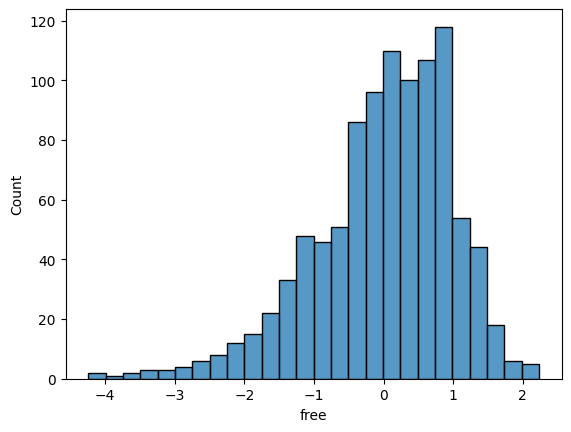

In [87]:
sns.histplot(data=df_std, x='free')

In [88]:
type(df_std[0][0])

numpy.ndarray

In [90]:
list(df_std.columns)[:-1]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [91]:
target_energy = "free"
features = list(df_std.columns)[:-1]
features
target_energy

'free'

In [38]:
class SequenceDataset(Dataset):
    def __init__(self,dataframe,target,features,sequence_length=30):
        self.features = features
        self.target = target
        self.sequence_length = sequence_length
        self.y = torch.tensor(dataframe[self.target].values).float()
        self.X = torch.tensor(dataframe[self.features].values).float()

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i):
        if i >= self.sequence_length - 1:
            i_start = i - self.sequence_length + 1
            x = self.X[i_start:(i + 1), :]
        else:
            padding = self.X[0].repeat(self.sequence_length - i - 1, 1)
            x = self.X[0:(i + 1), :]
            x = torch.cat((padding, x), 0)

        return x, self.y[i]


In [95]:
type(df_std[features].values[0][0])

numpy.ndarray

In [99]:
type(df_std[features].values)

numpy.ndarray

In [118]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   object 
 1   1       1000 non-null   object 
 2   2       1000 non-null   object 
 3   3       1000 non-null   object 
 4   4       1000 non-null   object 
 5   5       1000 non-null   object 
 6   6       1000 non-null   object 
 7   7       1000 non-null   object 
 8   8       1000 non-null   object 
 9   9       1000 non-null   object 
 10  10      1000 non-null   object 
 11  11      1000 non-null   object 
 12  12      1000 non-null   object 
 13  13      1000 non-null   object 
 14  14      1000 non-null   object 
 15  15      1000 non-null   object 
 16  16      1000 non-null   object 
 17  17      1000 non-null   object 
 18  18      1000 non-null   object 
 19  19      1000 non-null   object 
 20  20      1000 non-null   object 
 21  21      1000 non-null   object 
 22  2

# Problem: our dtypes are objects

In [110]:
df_np = df_std.iloc[:,:-1].to_numpy()
df_np

array([[array([[1., 0., 0., 0.]]), array([[0., 0., 0., 1.]]),
        array([[0., 0., 0., 1.]]), ..., array([[0., 1., 0., 0.]]),
        array([[0., 0., 0., 1.]]), array([[0., 1., 0., 0.]])],
       [array([[0., 0., 0., 1.]]), array([[0., 0., 0., 1.]]),
        array([[1., 0., 0., 0.]]), ..., array([[0., 0., 0., 1.]]),
        array([[0., 0., 1., 0.]]), array([[0., 1., 0., 0.]])],
       [array([[1., 0., 0., 0.]]), array([[1., 0., 0., 0.]]),
        array([[0., 0., 0., 1.]]), ..., array([[0., 0., 1., 0.]]),
        array([[0., 0., 1., 0.]]), array([[0., 1., 0., 0.]])],
       ...,
       [array([[0., 0., 1., 0.]]), array([[1., 0., 0., 0.]]),
        array([[0., 0., 0., 1.]]), ..., array([[0., 1., 0., 0.]]),
        array([[0., 1., 0., 0.]]), array([[1., 0., 0., 0.]])],
       [array([[0., 1., 0., 0.]]), array([[0., 0., 1., 0.]]),
        array([[0., 0., 0., 1.]]), ..., array([[0., 0., 0., 1.]]),
        array([[0., 0., 0., 1.]]), array([[1., 0., 0., 0.]])],
       [array([[0., 0., 1., 

In [117]:
df_np[features]

array([[array([[1., 0., 0., 0.]]), array([[0., 0., 0., 1.]]),
        array([[0., 0., 0., 1.]]), array([[1., 0., 0., 0.]]),
        array([[0., 1., 0., 0.]]), array([[0., 0., 0., 1.]]),
        array([[0., 0., 0., 1.]]), array([[0., 0., 1., 0.]]),
        array([[0., 1., 0., 0.]]), array([[1., 0., 0., 0.]]),
        array([[0., 0., 0., 1.]]), array([[0., 0., 1., 0.]]),
        array([[1., 0., 0., 0.]]), array([[0., 1., 0., 0.]]),
        array([[0., 0., 1., 0.]]), array([[1., 0., 0., 0.]]),
        array([[0., 0., 0., 1.]]), array([[0., 1., 0., 0.]]),
        array([[0., 0., 1., 0.]]), array([[0., 0., 0., 1.]]),
        array([[0., 0., 0., 1.]]), array([[0., 0., 1., 0.]]),
        array([[0., 0., 1., 0.]]), array([[0., 0., 0., 1.]]),
        array([[0., 1., 0., 0.]]), array([[0., 0., 1., 0.]]),
        array([[0., 0., 1., 0.]]), array([[0., 1., 0., 0.]]),
        array([[0., 0., 0., 1.]]), array([[0., 1., 0., 0.]])],
       [array([[0., 0., 0., 1.]]), array([[0., 0., 0., 1.]]),
       

### Tensor transformation works for individual indices

In [ ]:
a = torch.tensor(df_np[features][0][0], dtype=torch.int32)
b = torch.tensor(df_np[features][0][1], dtype=torch.int32)

### Does not work for the whole train dataset, nor for more than one one-hot encoded nd.array at the time

In [135]:
a = torch.tensor(df_np[features][0][0], dtype=torch.int32)
b = torch.tensor(df_np[features][0][1], dtype=torch.int32)
c = {'col1':[a,b]}
df_c = pd.DataFrame(data=c)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes


In [137]:
torch.tensor(df_c.values, dtype=torch.int32)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [98]:
torch.tensor(df_std[features].values[0][0], dtype=torch.int32)

tensor([[1, 0, 0, 0]], dtype=torch.int32)

In [55]:
torch.from_numpy(df_std[features].values)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [47]:
i = 27
sequence_length = 30

train_dataset = SequenceDataset(
    df_std,
    target=target_energy,
    features=features,
    sequence_length=sequence_length
)

X, y = train_dataset[i]
print(X)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

### So this step also does not work... once we solve this it should be pretty easy, the whole procedure for a LSTM regression is here: https://www.crosstab.io/articles/time-series-pytorch-lstm/